In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
print("hello")

hello


In [8]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.append(os.path.abspath(os.path.join(".", "src")))

from audio_processing import audio_import

In [9]:
loader = audio_import.AudioLoader()

print(loader.directory)
#ensure files can be viewed
os.listdir(loader.directory)

..\audio_files


['ex1.wav',
 'ex2.wav',
 'ex3.wav',
 'ex4.wav',
 'ex5.wav',
 'ex5_distorted.wav',
 'ex6.wav',
 'ex6_distorted.wav']

In [10]:
# test artificial distortion
print(os.listdir(os.path.join("..", "src", "audio_processing")))

from audio_processing.artifact_simulate import ArtifactSim

aSim = ArtifactSim()

artifacts = {}

artifacts['ex5_distorted.wav'] = aSim.distort_audio('ex5.wav', 'ex5_distorted.wav')
artifacts['ex6_distorted.wav'] = aSim.distort_audio('ex6.wav', 'ex6_distorted.wav')

['artifact_simulate.py', 'audio_import.py', 'distortion_detection.py', 'README.md', '__init__.py', '__pycache__']
Loading: ..\audio_files\ex5.wav
Loading: ..\audio_files\ex6.wav


In [11]:
loader = audio_import.AudioLoader()

data = loader.load_batch(['ex5_distorted.wav', 'ex6_distorted.wav'])

for name, info in data.items():
    print(f"{name}: {info['data'].shape}, {info['samplerate']} Hz")

Loading: ..\audio_files\ex5_distorted.wav
Loading: ..\audio_files\ex6_distorted.wav
ex5_distorted.wav: (361179,), 22050 Hz
ex6_distorted.wav: (344862,), 22050 Hz
Loading: ..\audio_files\ex6_distorted.wav
ex5_distorted.wav: (361179,), 22050 Hz
ex6_distorted.wav: (344862,), 22050 Hz


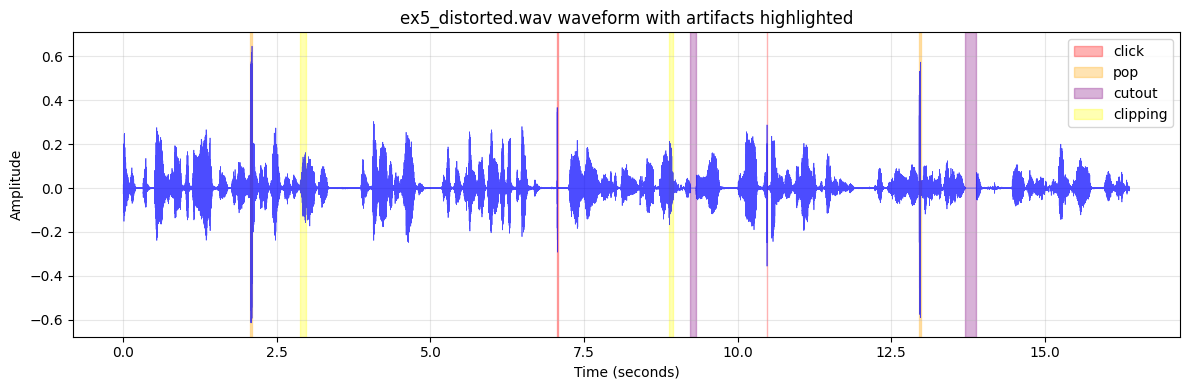

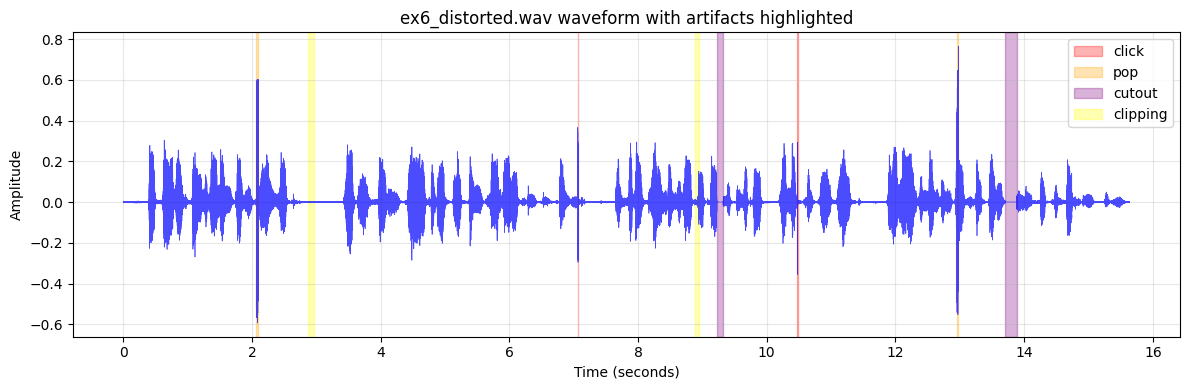

In [13]:
# visualize as sound wave with artifacts highlighted
for name, info in data.items():
    plt.figure(figsize=(12, 4))
    
    # Create time axis in seconds
    duration = len(info['data']) / info['samplerate']
    time_axis = np.linspace(0, duration, len(info['data']))
    
    # Plot waveform
    plt.plot(time_axis, info['data'], alpha=0.7, linewidth=0.5, color='blue')
    
    # Highlight artifacts if available
    if name in ['ex5_distorted.wav', 'ex6_distorted.wav']:
        # artifacts is a list of tuples: (type, timestamp_in_seconds, duration_ms)
        if 'artifacts' in locals() or 'artifacts' in globals():
            for artifact_data in artifacts[name]:
                artifact_type = artifact_data[0]
                timestamp = artifact_data[1]
                duration_ms = artifact_data[2] if len(artifact_data) > 2 else 10
                duration_sec = duration_ms / 1000  # Convert ms to seconds
                
                color_map = {
                    'click': 'red',
                    'pop': 'orange', 
                    'cutout': 'purple',
                    'clipping': 'yellow'
                }
                color = color_map.get(artifact_type, 'gray')
                
                # Highlight the region with axvspan
                plt.axvspan(timestamp, timestamp + duration_sec, 
                           color=color, alpha=0.3, label=artifact_type)
    
    plt.title(f"{name} waveform with artifacts highlighted")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)
    
    # Add legend (remove duplicates)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
    
    plt.tight_layout()
    plt.show()

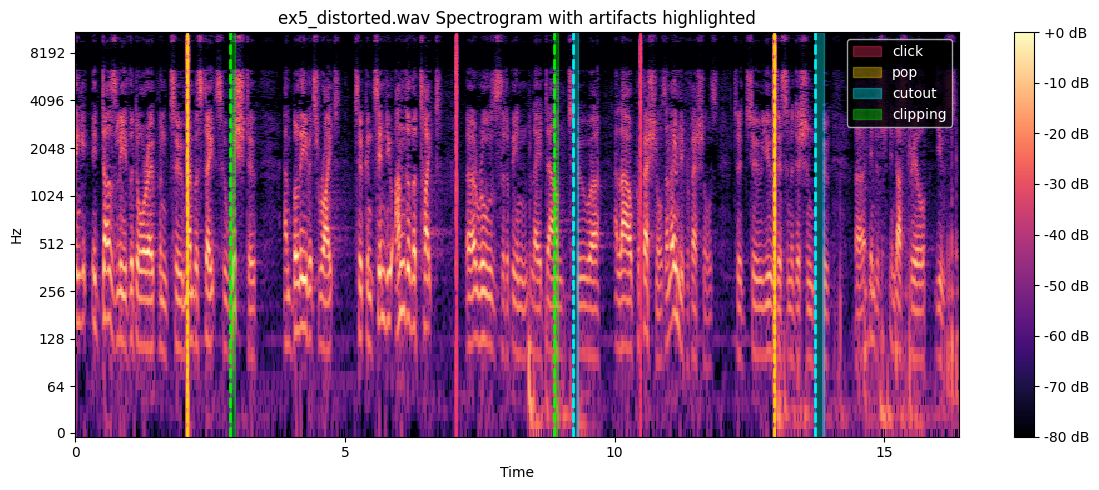

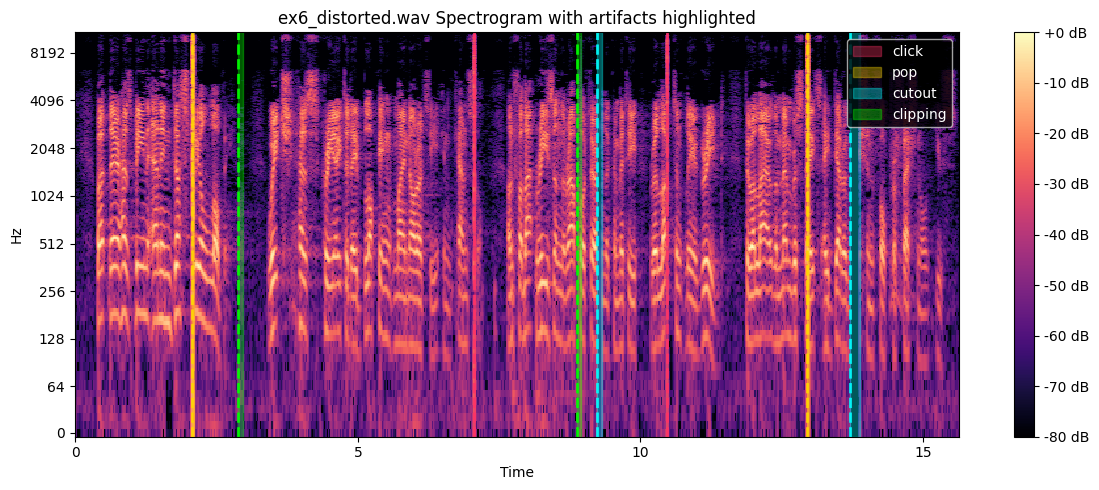

In [40]:
# visualize as spectrogram with artifacts highlighted
import numpy as np
import librosa.display

for name, info in data.items():
    plt.figure(figsize=(12, 5))
    
    # Compute the spectrogram
    S = np.abs(librosa.stft(info['data']))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=info['samplerate'], x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    
    # Highlight artifacts if available
    if name in ['ex5_distorted.wav', 'ex6_distorted.wav']:
        if 'artifacts' in locals() or 'artifacts' in globals():
            for artifact_data in artifacts[name]:
                artifact_type = artifact_data[0]
                timestamp = artifact_data[1]
                duration_ms = artifact_data[2] if len(artifact_data) > 2 else 10
                duration_sec = duration_ms / 1000  # Convert ms to seconds
                
                # Brighter colors with better contrast for spectrogram
                color_map = {
                    'click': '#FF3366',      # Bright pink/red
                    'pop': '#FFD700',        # Bright gold
                    'cutout': '#00FFFF',     # Cyan
                    'clipping': '#00FF00'    # Bright green
                }
                color = color_map.get(artifact_type, 'white')
                
                # Highlight the region with axvspan (higher alpha for visibility)
                plt.axvspan(timestamp, timestamp + duration_sec, 
                           color=color, alpha=0.35, label=artifact_type)
                # Add a brighter vertical line at the start
                plt.axvline(x=timestamp, color=color, alpha=0.9, 
                           linestyle='--', linewidth=2)
    
    plt.title(f"{name} Spectrogram with artifacts highlighted")
    
    # Add legend (remove duplicates) with darker background for visibility
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    if by_label:
        legend = plt.legend(by_label.values(), by_label.keys(), loc='upper right')
        legend.get_frame().set_facecolor('black')
        legend.get_frame().set_alpha(0.8)
        for text in legend.get_texts():
            text.set_color('white')
    
    plt.tight_layout()
    plt.show()


ex5_distorted.wav
  No clipping detected.
  Cutout regions:
- 00:00.22  - 00:00.30
- 00:00.45  - 00:00.50
- 00:03.35  - 00:03.50
- 00:03.67  - 00:03.85
- 00:04.92  - 00:05.00
- 00:05.02  - 00:05.17
- 00:06.85  - 00:06.95
- 00:07.07  - 00:07.25
- 00:09.25  - 00:09.32
- 00:09.80  - 00:10.00
- 00:11.89  - 00:11.97
- 00:12.02  - 00:12.22
- 00:13.69  - 00:13.87
- 00:14.32  - 00:14.44


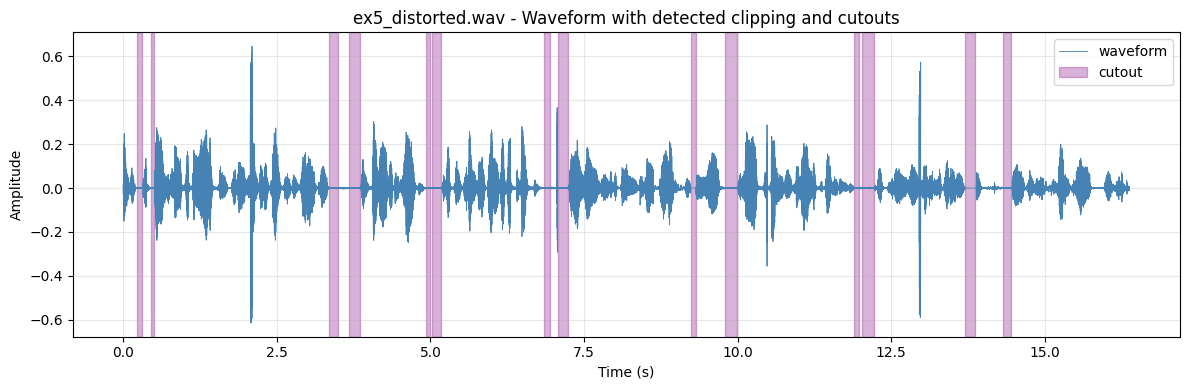


ex6_distorted.wav
  No clipping detected.
  Cutout regions:
- 00:00.00  - 00:00.15
- 00:00.27  - 00:00.37
- 00:02.80  - 00:02.87
- 00:02.95  - 00:03.40
- 00:07.22  - 00:07.42
- 00:07.57  - 00:07.65
- 00:09.25  - 00:09.32
- 00:10.07  - 00:10.17
- 00:11.49  - 00:11.62
- 00:11.74  - 00:11.87
- 00:13.72  - 00:13.87
- 00:15.09  - 00:15.24
- 00:15.57  - 00:15.64


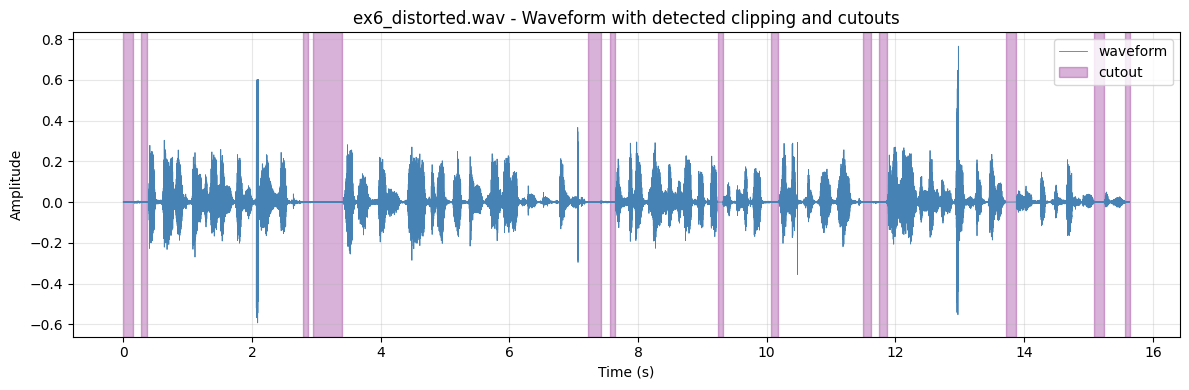

In [39]:
# Detect and visualize clipping and cutout regions on waveform
from audio_processing import distortion_detection as dd
from audio_processing.utils import seconds_to_mmss
import matplotlib.pyplot as plt
import numpy as np

for name, info in data.items():
    audio = info['data']
    sr = info['samplerate']

    # Run detectors
    clipping_regions = dd.detect_clipping(audio, sr, threshold=0.98, min_clip_duration_ms=10)
    cutout_regions = dd.detect_cutout(audio, sr, threshold=0.001, min_silence_duration_ms=50)

    print(f"\n{name}")
    if clipping_regions:
        print("  Clipping regions:")
        for start, end in clipping_regions:
            print(f"- {seconds_to_mmss(start)}  - {seconds_to_mmss(end)}")
    else:
        print("  No clipping detected.")
    if cutout_regions:
        print("  Cutout regions:")
        for start, end in cutout_regions:
            print(f"- {seconds_to_mmss(start)}  - {seconds_to_mmss(end)}")
    else:
        print("  No cutouts detected.")

    # Plot waveform with overlays
    duration = len(audio) / sr
    t = np.linspace(0, duration, len(audio))
    plt.figure(figsize=(12, 4))
    plt.plot(t, audio, color='steelblue', linewidth=0.6, label='waveform')

    # Overlay clipping regions (yellow)
    for (start, end) in clipping_regions:
        plt.axvspan(start, end, color='yellow', alpha=0.35, label='clipping')
    # Overlay cutout regions (purple)
    for (start, end) in cutout_regions:
        plt.axvspan(start, end, color='purple', alpha=0.3, label='cutout')

    plt.title(f"{name} - Waveform with detected clipping and cutouts")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)

    # Deduplicate legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    if by_label:
        plt.legend(by_label.values(), by_label.keys(), loc='upper right')

    plt.tight_layout()
    plt.show()